In [54]:
import tensorflow as tf
from IPython.display import Image, display

import matplotlib.pyplot as plt
import tensorflow_hub as hub

import numpy as np

import warnings
warnings.filterwarnings('ignore')

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [ ]:
!nvidia-smi

Fri Feb 11 12:28:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install kaggle

In [ ]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download pranavsingaraju/facemask-detection-dataset-20000-images

100% 601M/604M [00:16<00:00, 42.9MB/s]
100% 604M/604M [00:16<00:00, 38.2MB/s]


In [15]:
# ! unzip facemask-detection-dataset-20000-images.zip

In [6]:
!mkdir mask

In [7]:
!ls 

kaggle.json  mask  new_with_mask  new_without_mask  sample_data


In [8]:
!mv new_with_mask mask

In [9]:
!mv new_without_mask mask

In [10]:
ls

kaggle.json  mask/  sample_data/


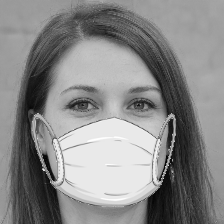

In [11]:
display(Image('/content/mask/new_with_mask/with-mask-default-mask-seed0000.png'))

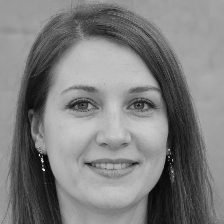

In [12]:
display(Image('/content/mask/new_without_mask/seed0000.png'))

In [43]:
TRAINING_DIR = "/content/mask/"

train_datagen = ImageDataGenerator(rescale=1.0/255.,validation_split=0.25,  
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  featurewise_center=True,
                                  rotation_range=20,
                                  width_shift_range=0.15,
                                  height_shift_range=0.25,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    class_mode='binary',
                                                    subset = 'training',
                                                    target_size=(224, 224))

validation_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                         class_mode='binary',
                                                         subset = 'validation',
                                                         target_size=(224, 224))

Found 15000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [57]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [58]:
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [59]:
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
469/469 [==============================] - 250s 530ms/step - loss: 0.6566 - acc: 0.7788 - val_loss: 0.0920 - val_acc: 0.9706
Epoch 2/5
469/469 [==============================] - 246s 524ms/step - loss: 0.1167 - acc: 0.9620 - val_loss: 0.0319 - val_acc: 0.9882
Epoch 3/5
469/469 [==============================] - 245s 522ms/step - loss: 0.0781 - acc: 0.9771 - val_loss: 0.0234 - val_acc: 0.9912
Epoch 4/5
469/469 [==============================] - 245s 523ms/step - loss: 0.0800 - acc: 0.9811 - val_loss: 0.0062 - val_acc: 0.9978
Epoch 5/5
469/469 [==============================] - 248s 529ms/step - loss: 0.0639 - acc: 0.9881 - val_loss: 0.2639 - val_acc: 0.9310


In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 93312)             0         
                                                                 
 dense_5 (Dense)             (None, 512)              

<Figure size 432x288 with 0 Axes>

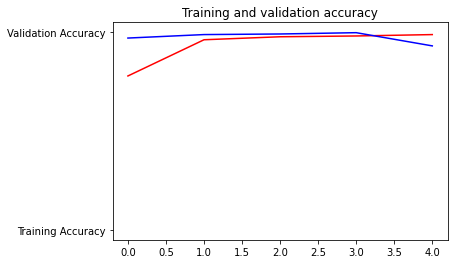

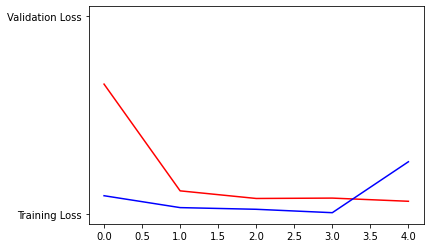

<Figure size 432x288 with 0 Axes>

In [62]:
%matplotlib inline

import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

In [ ]:
# result=model.evaluate(test_ds)

1/1 [==============================] - 1s 711ms/step - loss: 0.2727 - accuracy: 0.8906


In [65]:
model.save('./models', save_format='tf')

INFO:tensorflow:Assets written to: ./models/assets


INFO:tensorflow:Assets written to: ./models/assets


In [66]:
!ls -alrt models

total 152
drwxr-xr-x 1 root root   4096 Feb 11 13:49 ..
drwxr-xr-x 2 root root   4096 Feb 11 13:49 variables
drwxr-xr-x 2 root root   4096 Feb 11 13:49 assets
-rw-r--r-- 1 root root 120174 Feb 11 13:49 saved_model.pb
-rw-r--r-- 1 root root  15194 Feb 11 13:49 keras_metadata.pb
drwxr-xr-x 4 root root   4096 Feb 11 13:49 .


In [67]:
model_loaded = tf.keras.models.load_model('./models/')

In [68]:
model_loaded.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 93312)             0         
                                                                 
 dense_5 (Dense)             (None, 512)              

In [75]:
print(tf.__version__)

2.7.0
